# Fast Fourier Transforms (FFT)

In this set of exercises, we are going to go through several examples of how to use FFTs for "practical" applications.

Table of Contents
1. [Introduction]()
   1. [Additional resources]()
   1. [Real Life Applications ]()
1. [Technical details for the FFT algorithms and functions that we are going to use]()
   1. [Import libraries]()
   1. [Basic examples of fftpack usage]()
1. [Hands on applications of FFT]()
   1. [Simple sine wave function]()
   1. [Noisy sine function]()
   1. [Two dimensional Fourier Transform]()
1. [Examples using wav files]()
   1. [Importing and manipulating WAV files]()
1. [Digital Image Processing: Making an image blurry using FFT]()

## Introduction

As discussed in the lecture, the FFT is a discrete Fourier transform algorithm that samples a signal over a period of time and divides it into its frequency components. 

Somewhat separately, Fourier analysis converts a dignal from its orginal domain into a frequency domain representation. FFT rapidly computes the transformation by factoring the descrete Fourier matrix into a product of sparse factors.

### Additional resources
* [Youtube video](https://www.youtube.com/watch?v=Qm84XIoTy0s) that goes into a lot of great detail and example
* [An Interactive Guide To The Fourier Transform](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/): this is a great website that breaks down what the Fourier transform is and how it is used

### Real Life Applications 
*Where is the Fourier Transform used in the real world?*
* sound wave analysis
* image data analysis
* digital image processing
* computer -assisted image processing
* Edge detection
    (when you take a picture and you want to outline a person or something and transfer it to another image)  

## Technical details for the FFT algorithms and functions that we are going to use

Rather than write our own "full" FFT (we already wrote a basic version in the [Fourier Transforms and Analysis](https://github.com/UChicagoPhysics/PHYS250/blob/master/Examples/Fourier-Transforms-Analysis.ipynb) notebook) we are going to use a very standard set of libraries from `scipy`:

* [scipy.fftpack](https://docs.scipy.org/doc/scipy/reference/fftpack.html)

This provides highly optimized code the performs FFT and inverse FFT, for example:

~~~~
fft(x[, n, axis, overwrite_x])   Return discrete Fourier transform of real or complex sequence.
ifft(x[, n, axis, overwrite_x])  Return discrete inverse Fourier transform of real or complex sequence.
~~~~

We will use these codes below. But first let's get our hands a bit dirty.

### Import the usual libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

### Basic examples of `fftpack` usage

Here is an example of `fft` and `ifft`

In [2]:
from scipy.fftpack import fft, ifft

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x) # fft Return discrete Fourier transform of real or complex sequence. 
y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [3]:
yinv = ifft(y) #Return discrete inverse Fourier transform of real or complex sequence.
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

----
# DISCUSSION

1. What do you notice about the return values?
1. How does this relate to the details of (F)FT's that we discussed already?
1. Where does this come from?
----

`fftfreq` returns sample frequency points:

>Return the Discrete Fourier Transform sample frequencies.
>
>The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing (with zero at the start). For instance, if the sample spacing is in seconds, then the frequency unit is cycles/second.
>
>Given a window length n and a sample spacing d

https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html

In [4]:
from scipy.fftpack import fftfreq

freq = fftfreq(8, 0.125)
freq


array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

## Hands on applications of FFT

Here we plot the fast fourier transform (FFT) of the sum of two sine waves. We will import the libraries again since this is a long notebook and I don't want you to forget what we're doing!

In [5]:
from scipy.fftpack import fft

# Number of sample points
N = 6000

# sample spacing
T = 1.0 / 2000.0                           ## Define a sampling frequency

# "Spatial" coordinates 
x = np.linspace(0.0, N*T, N)              ## Range given by number of points times spatial sampling frequency
print("x = ")
#print(x)

# "Frequency" coordinates
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)  ## Range given by inverse of the spatial sampling frequency
print("xf = ")
#print(xf)

x = 
xf = 


----
# DISCUSSION
1. Why are we defining the linear space this way?
1. How are `x` and `xf` related?
----

### Simple sine wave function 

In [7]:
# Function that we want to tranform
a = np.sin(50.0 * 2.0*np.pi*x)
b = 0.5*np.sin(80.0 * 2.0*np.pi*x)
c = 0.5*np.sin(160.0 * 2.0*np.pi*x)
y = a+b+c

Now compute the FFT using the `fftpack` library

In [8]:
# Fast Fourier Transform
yf = fft(y)

Plot the FFT

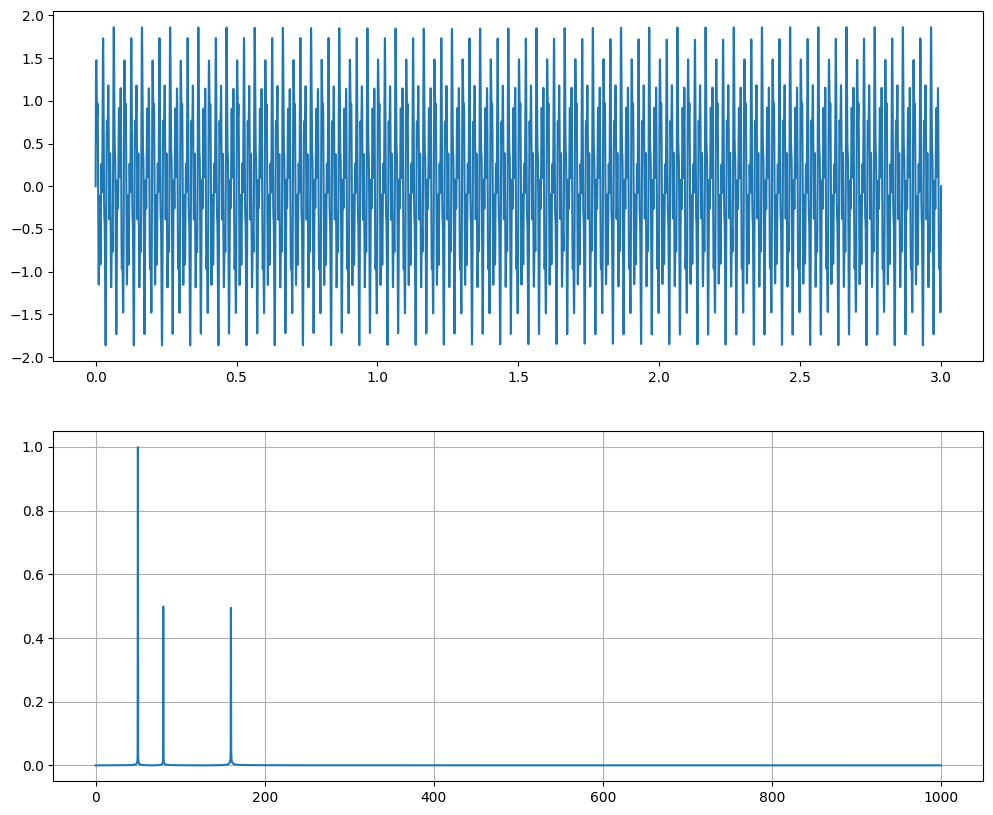

In [9]:
# Plot both the function and the FFT
fig,axs = plt.subplots(ncols=1, nrows=2, figsize=(12,10))

axs[0].plot(x,y)                                 ## This is the function itself
axs[1].plot(xf, 2./N * np.abs(yf[0:N//2]))       ## This is its tranform
plt.grid()
plt.show()

----
# DISCUSSION
1. What are some features of the FFT spectrum that you plotted?
----

## Noisy sine function

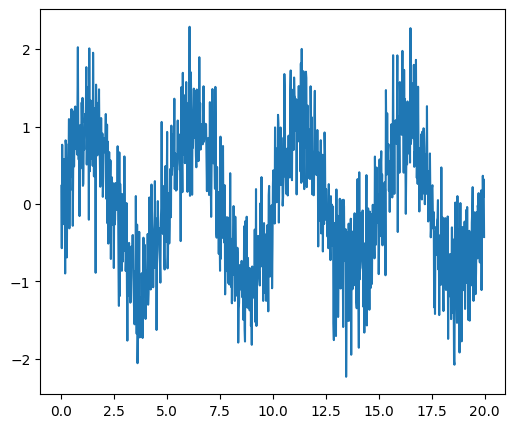

In [10]:
# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

[]

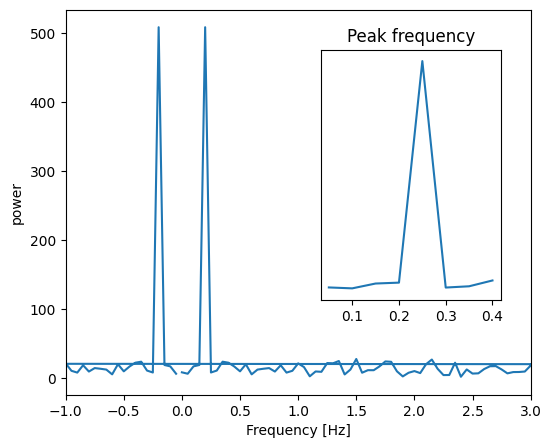

In [11]:
# The FFT of the signal
sig_fft = fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlim(-1,3)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

In [13]:
peak_freq

np.float64(0.2)

### Remove all the high frequencies

We now remove all the high frequencies and transform back from frequencies to signal.

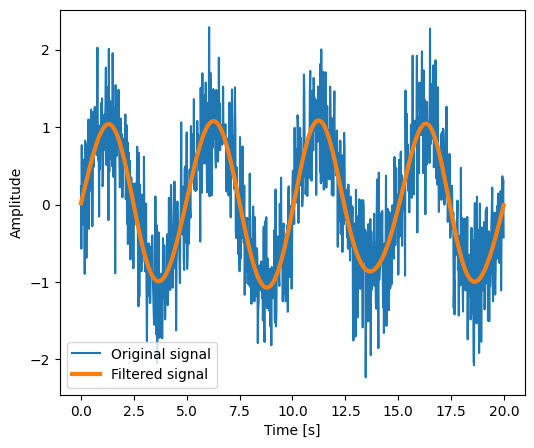

In [17]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq*2] = 0
filtered_sig = ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

plt.show()

## Two dimensional Fourier Transform

The following example demonstrates a 2-dimensional inverse fast fourier transform.

In [18]:
from scipy.fftpack import ifftn

----
# DISCUSSION
1. Look in the `fftpack` documentation and discuss what this library does
----

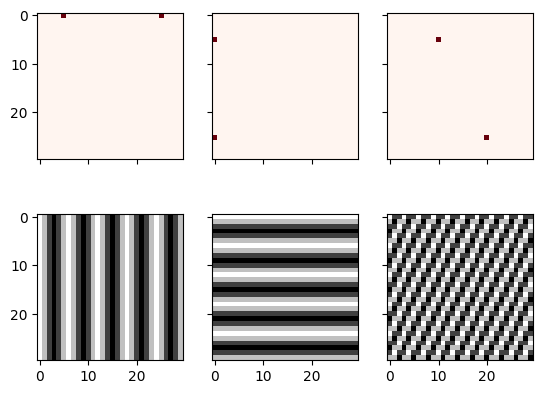

In [19]:
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')

xf = np.zeros((N,N))

xf[0, 5]   = 1
xf[0, N-5] = 1

Z = ifftn(xf)

ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 0]   = 1
xf[N-5, 0] = 1

Z = ifftn(xf)

ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 10]     = 1
xf[N-5, N-10] = 1

Z = ifftn(xf)

ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)

plt.show()

2-D Fourier Transforms are used in image processing. They are used to see peaks of spacial frequencies of repeated texture in images such as finger prints!

----
# DISCUSSION
1. What happens when you change the spacing of the pixels?
1. What happens when you add more?
----

## Examples using wav files

Downloaded wav files from [here](http://www.wavsource.com/sfx/sfx3.htm).
More websites available to get wav files [here](https://www.thefreesite.com/Free_Sounds/Free_WAVs/)
Also [here](https://www.audiocheck.net/audiofrequencysignalgenerator_sinetone.php)

Think about a mechanic who takes a sound sample of an engine and then relies on a machine to analyze that sample, looking for potential engine problems. The diagnostic can find some problems and visual inspection can find others, but sometimes the sound of an engine reveals issues that you can’t find in any other way.

### Importing and manipulating WAV files

In [20]:
from scipy.io import wavfile as wav

What does this do? What are the blue lines at the bottom?

According to [the FFT documentation from `numpy`](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.fft.html):

> If `A = fft(a, n)`, then `A[0]` contains the zero-frequency term (the sum of the signal), which is always purely real for real inputs. Then `A[1:n/2]` contains the positive-frequency terms, and `A[n/2+1:]` contains the negative-frequency terms, in order of decreasingly negative frequency. For an even number of input points, `A[n/2]` represents both positive and negative Nyquist frequency, and is also purely real for real input. For an odd number of input points, `A[(n-1)/2]` contains the largest positive frequency, while `A[(n+1)/2]` contains the largest negative frequency. The routine `np.fft.fftfreq(n)` returns an array giving the frequencies of corresponding elements in the output. The routine `np.fft.fftshift(A)` shifts transforms and their frequencies to put the zero-frequency components in the middle, and `np.fft.ifftshift(A)` undoes that shift.

> When the input a is a time-domain signal and `A = fft(a)`, `np.abs(A)` is its amplitude spectrum and `np.abs(A)**2` is its power spectrum. The phase spectrum is obtained by `np.angle(A)`.


Let's read in the waveforms from the `WAV` files:

Sampling rate ocean: 11025 [samples/s]
Sampling rate phone: 11025 [samples/s]


(0.0, 4000.0)

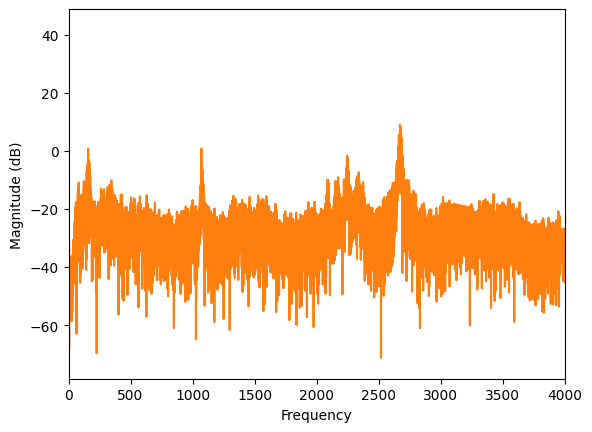

In [21]:
rate_ocean, data_ocean = wav.read('ocean.wav')
rate_phone, data_phone = wav.read('phone_ring_old.wav')
#rate_phone, data_phone = wav.read('Tuning-fork-mod.wav')

print("Sampling rate ocean: " + str(rate_ocean) + " [samples/s]")
print("Sampling rate phone: " + str(rate_phone) + " [samples/s]")

plt.magnitude_spectrum(data_phone, Fs=rate_phone, scale='dB', color='C1')
plt.xlim(0,4000)

Compute the FFT 

In [ ]:
# Compute the fast Fourier transforms of the waveforms
fft_out_ocean = fft(data_ocean)
fft_out_phone = fft(data_phone)

# Figure out how many samples total we have
len_ocean = len(fft_out_ocean)
len_phone = len(fft_out_phone)

# Amplitudes
amp_ocean = 2.0/len_ocean * np.abs(fft_out_ocean[:len_ocean//2])
amp_phone = 2.0/len_phone * np.abs(fft_out_phone[:len_phone//2])

In [ ]:
fig,axes = plt.subplots(ncols=2, nrows=4, figsize=(20,18))

colorA = 'C1'
colorB = 'C2'

# Plot the waveforms themselves
axes[0, 0].plot(data_ocean, color=colorA)
axes[0, 0].set_title("Ocean waveform")
axes[0, 0].set_xlabel("Time [s]")

axes[0, 1].plot(data_phone, color=colorB)
axes[0, 1].set_title("Phone ringing waveform")
axes[0, 1].set_xlabel("Time [s]")
#axes[0, 1].set_xlim(0, 11000)

# Plot the amplitude of the Fourier components
axes[1, 0].semilogy(amp_ocean, color=colorA)
axes[1, 0].set_xlabel("Frequency")
axes[1, 0].set_ylabel("Amplitude")

axes[1, 1].semilogy(amp_phone, color=colorB)
axes[1, 1].set_xlabel("Frequency")
axes[1, 1].set_ylabel("Amplitude")
axes[1, 1].set_xlim(0, 2000)

# Plot the amplitudes of the waveforms as a function of the amplitude of the Fourier components
axes[2, 0].plot(data_ocean, np.abs(fft_out_ocean), color=colorA)
axes[2, 0].set_xlabel("Waveform data")
axes[2, 0].set_ylabel("Amplitude (linear)")

axes[3, 0].semilogy(data_ocean, np.abs(fft_out_ocean), color=colorA)
axes[3, 0].set_xlabel("Waveform data")
axes[3, 0].set_ylabel("Amplitude (log)")

# Plot the amplitudes of the waveforms as a function of the amplitude of the Fourier components
axes[2, 1].plot(data_phone, np.abs(fft_out_phone), color=colorB)
axes[2, 1].set_xlabel("Waveform data")
axes[2, 1].set_ylabel("Amplitude (linear)")

axes[3, 1].semilogy(data_phone, np.abs(fft_out_phone), color=colorB)
axes[3, 1].set_xlabel("Waveform data")
axes[3, 1].set_ylabel("Amplitude (log)")


#plt.tight_layout()

This code reads a .wav file and solves the Fourier transform! 
The output displays the strongest detected frequencies over time. The blue lines at the bottom are the extra noise of the signal. 

## Digital Image Processing: Making an image blurry using FFT

Here is a "clear" example on how 2-D FFT applictions are applied to images. 

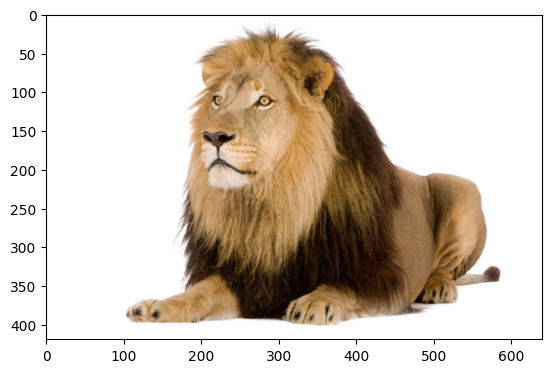

In [22]:
img = plt.imread('lion.png')
plt.figure()
plt.imshow(img)

In [23]:
# First a 1-D  Gaussian
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapezoid(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]


Padded fourier transform, with the same shape as the image

We use `scipy.signal.fftpack.fft2` to have a 2D FFT

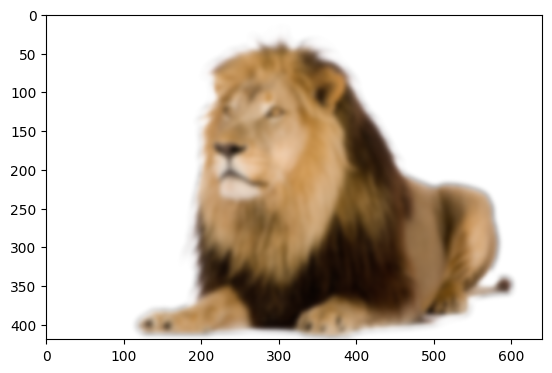

In [24]:
from scipy import fftpack

kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

img_ft = fftpack.fft2(img, axes=(0, 1))

img2_ft = kernel_ft[:, :, np.newaxis] * img_ft # the 'newaxis' is to match to color direction
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

img2 = np.clip(img2, 0, 1) # clip values to range

# plot 
plt.figure()
plt.imshow(img2)
